In [1]:
# so that images appear in the notebook, not separate windows
%matplotlib inline  

## Exercise on Image Manipulation

In this exercise, we will get some practice with basic image analyis.  Topics include getting basic statistics from image data, and image segmentation.  

We will make use the OpenCV python library for image analysis tools.  http://www.opencv.org

Note that there are many different imaging packages in python.  The Python Imaging Library (PIL) Pillow does basic image manipulation    http://pythonware.com/products/pil/

There are also many domain specific libraries.



In [2]:
# Some libraries we will use
import numpy
np = numpy
import matplotlib.pyplot as plt
import cv2   ## Opencv

Let us try loading an image as an example: https://www.reddit.com/r/AnimalPorn/comments/1l6vu4/elephants_at_the_end_of_the_day_on_the_plains_of/


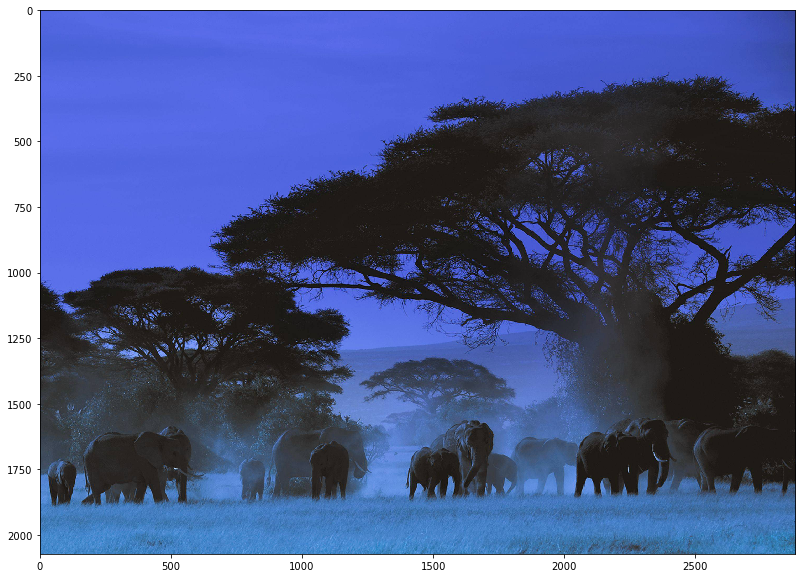

In [3]:
# Load an image and display it
myimage = cv2.imread('elephants.jpg')
plt.figure(figsize=(15,10))
plt.imshow(myimage)

# Examine the data.

In [4]:
myimage.shape

(2073, 2880, 3)

In [5]:
myimage.mean()

87.792663499848132

In [6]:
myimage[122:125,322:324]

array([[[ 79, 100, 222],
        [ 79, 100, 222]],

       [[ 79, 100, 222],
        [ 79, 100, 222]],

       [[ 79, 100, 222],
        [ 79, 100, 222]]], dtype=uint8)

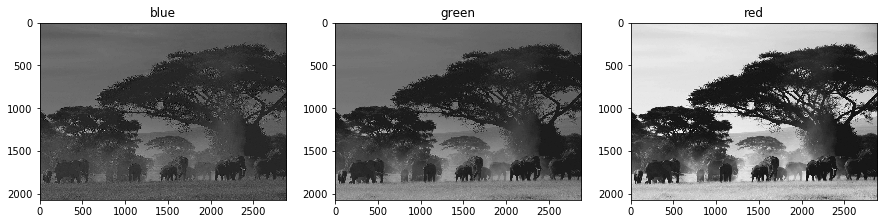

In [7]:
blue,green,red = cv2.split(myimage)

plt.figure(figsize=(15,10))

plt.subplot(131)
plt.imshow(blue,cmap='gray')
plt.title('blue')

plt.subplot(132)
plt.imshow(green,cmap='gray')
plt.title('green')

plt.subplot(133)
plt.imshow(red,cmap='gray')
plt.title('red')

plt.show()

In [8]:
blue.shape, green.shape, red.shape

((2073, 2880), (2073, 2880), (2073, 2880))

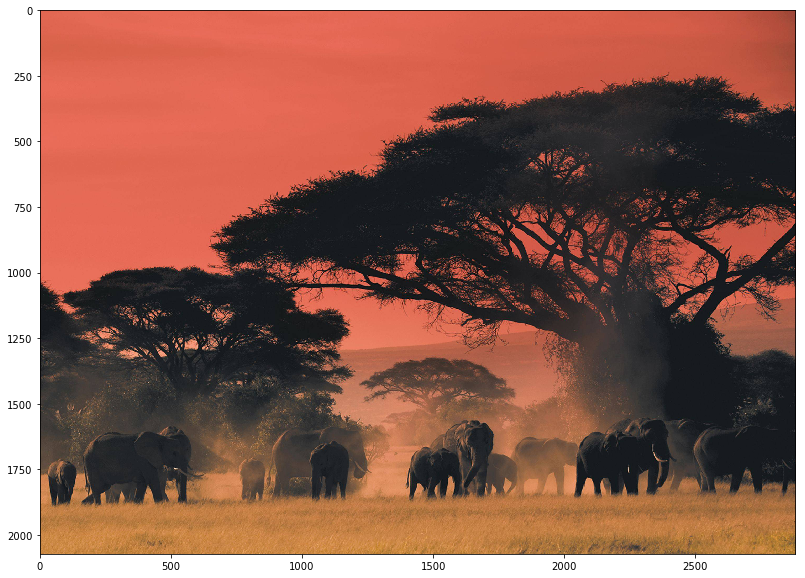

In [9]:
rgb_image = cv2.merge([red,green,blue])
rgb_image.shape
plt.figure(figsize=(15,10))
plt.imshow(rgb_image)

In [10]:
rgb_image.shape

(2073, 2880, 3)

In [11]:
rgb_image[122:125,322:324]

array([[[222, 100,  79],
        [222, 100,  79]],

       [[222, 100,  79],
        [222, 100,  79]],

       [[222, 100,  79],
        [222, 100,  79]]], dtype=uint8)

In [12]:
# convert to grey scale
#   greyscale is weighted, e.g.:   Y = 0.2125 R + 0.7154 G + 0.0721 B  
grey_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2GRAY)
grey_image.shape

(2073, 2880)

In [13]:
grey_image[122:125,322:324]

array([[134, 134],
       [134, 134],
       [134, 134]], dtype=uint8)

In [ ]:
min,max,mean, median = grey_image.min(), grey_image.max(), grey_image.mean(), numpy.median(grey_image)
min,max,mean, median

In [ ]:
plt.imshow(grey_image, cmap='gray')

## Segmentation
Otsu's method.  Binary threshold.  Creates 2 segments.  The threshold is the value that minimizes the pixel variance within each segment.  https://en.wikipedia.org/wiki/Otsu%27s_method

In [ ]:
# Make a Histogram of the pixel values.
plt.hist(grey_image.ravel(),256)
plt.show()

In [ ]:
ret, thresh = cv2.threshold(grey_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

ret, thresh.shape

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(rgb_image)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh,'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()  

# Now, a different image.

In [ ]:
image2 = cv2.imread('140502112516-01-hot-air-balloon---alburquerque---restricted-horizontal-large-gallery.jpg')
plt.imshow(image2)

In [ ]:
blue,green,red = cv2.split(image2)
rgb_image2 = cv2.merge([red,green,blue])
plt.figure(figsize=(15,10))
plt.imshow(rgb_image2)

# Exercise To Do:  Produce a segmented version of this image

In [ ]:
grey_image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)






In [ ]:
# Make a Histogram of the pixel values.
plt.hist(grey_image2.ravel(),256)
plt.show()

# Sharpen an image

In [ ]:
# 1st -- make a smooth version -- Here we use a Gaussian
gauss_image2 = cv2.GaussianBlur(grey_image2,(11,11),0)
plt.figure(figsize=(15,10))
plt.imshow(gauss_image2, 'gray')

In [ ]:
gauss_rgb_image2 = cv2.GaussianBlur(rgb_image2,(11,11),0)
plt.figure(figsize=(15,10))
plt.imshow(gauss_rgb_image2)

In [ ]:
# -- Divide original image by smoothed image
normfactor = 100.
sharp_image2 = grey_image2/gauss_image2
sharp_image2 = sharp_image2 * normfactor
plt.figure(figsize=(15,10))
plt.imshow(sharp_image2,'gray')

In [ ]:
normfactor = 100.
sharp_rgb_image2 = rgb_image2/gauss_rgb_image2 
sharp_rgb_image2 = sharp_rgb_image2 * normfactor
plt.figure(figsize=(15,10))
plt.imshow(sharp_rgb_image2)

# Watershed Coins Example  (from OpenCV)


In [ ]:
image3 = cv2.imread('water_coins.jpg')
blue,green,red = cv2.split(image3)
rgb_image3 = cv2.merge([red,green,blue])

grey_image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
value, threshold = cv2.threshold(grey_image3,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(rgb_image3)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(threshold, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()  

In [ ]:
plt.hist(grey_image3.ravel(),256,[0,256])
plt.show()

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(threshold,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
    

In [ ]:
plt.subplot(121),plt.imshow(sure_bg, 'gray')
plt.title('Sure Background'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg, 'gray')
plt.title("Sure Foreground"), plt.xticks([]), plt.yticks([])
plt.show()  

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
    
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
    
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [ ]:
plt.imshow(markers)

In [ ]:
markers = cv2.watershed(image3,markers)
image3[markers == -1] = [255,0,0]
plt.imshow(markers)

In [ ]:
# Can we store the positions of these features?

ret, thresh_fg = cv2.threshold(sure_fg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contourimage, contours, hierarchy = cv2.findContours(thresh_fg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
imagecopy = image3.copy()
cv2.drawContours(imagecopy,contours,-1,(0,255,0),3)  
plt.imshow(imagecopy,'gray')

In [ ]:
moments = [cv2.moments(cnt) for cnt in contours]
centroids = [(int(M['m10'] / M['m00']), int(M['m01'] / M['m00'])) for M in moments[1:]]
centroids

In [ ]:
imagetmp = image3.copy()
for c in centroids:
    cv2.circle(imagetmp, c, 3, (255,255,0))
plt.figure(figsize=(15,10))
plt.imshow(imagetmp)

# Exercise to do:
Find the balloon positions in the ballon image

In [ ]:
grey_image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)


# Microscope images -- yeast.

https://sciencebrewer.wordpress.com/tag/bacteria/


In [ ]:
image4 = cv2.imread('yeast.jpg')
blue,green,red = cv2.split(image4)
rgb_image4 = cv2.merge([red,green,blue])
plt.figure(figsize=(15,10))
plt.imshow(rgb_image4)

In [ ]:
plt.hist(image4.ravel(),256,[0,256])
plt.show()

# Exercise to do:
Can you find the positions of the features in the above image?

In [ ]:
##  Note OpenCV works with image data type of uint8
#   To convert image types:    
#       imageuint8 = cv2.convertScaleAbs(imagefloat)
#  To check image type:
#       image.dtype